# 9.Convert the normal distribution to standard normal distribution for salary column

In [136]:
#Normal Distribution is the most common or normal form of distribution of Random Variables,
# hence the name "normal distribution." It is also called the Gaussian Distribution or  sysmterical  distribution
# or bellcurve in Statistics or Probability. We use this distribution to represent a large number of random variables. 
# It serves as a foundation for statistics and probability theory. 

In [137]:
# Standard Normal Distribution, often referred to as the Z-Distribution, is a specific type of normal distribution 
# that has a mean (μ) of 0 and a standard deviation (σ) of 1. Distribution of a normal random variable with mean 0 (μ = 0) 
# and variance 1 (σ2 = 1 ) is what we call as a standard normal distribution. 
# This is the basic difference between Normal Distribution and Standard Normal Distribution.

In [4]:
from QQUnivariate import QQUnivariate
import pandas as pd

In [5]:
dataset=pd.read_csv("Placement.csv")

In [6]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [183]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [184]:
dataset.dropna(subset=['salary'],inplace=True)

In [185]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Normal Distribution Plot

In [7]:
#Seaborn: Simple and Integrates well with Matplotlib for static plot
import seaborn as sns
import matplotlib.pyplot as plt

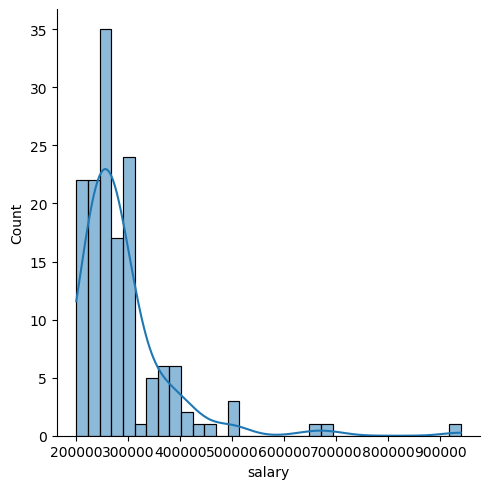

In [8]:
sns.displot(dataset["salary"],kde=True)

No handles with labels found to put in legend.


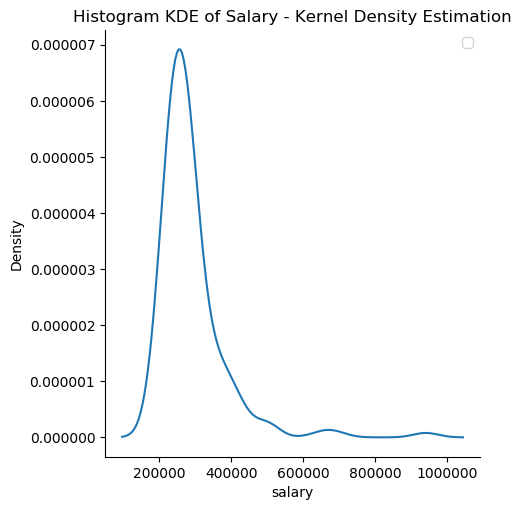

In [9]:
#The Kind parameter allows you to choose between histogram (kde- Kernel Density Estimation) kde or ecdf
#kde -provides a smooth curve that represents the distribution of data points, making it a useful tool for data visualization and analysis.
sns.displot(dataset, x="salary", kind="kde")
plt.title("Histogram KDE of Salary - Kernel Density Estimation")
plt.legend()
plt.show()

No handles with labels found to put in legend.


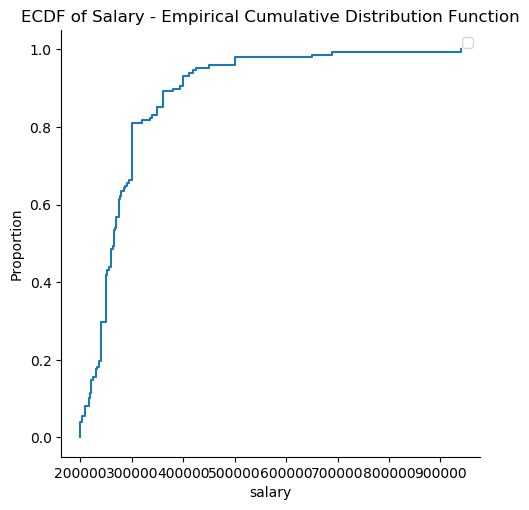

In [10]:
#ecdf plot visualizes the proportion or count of observations below each unique value in a dataset. 
# It is particularly useful for comparing distributions without requiring binning or smoothing.
sns.displot(dataset, x="salary", kind="ecdf")
plt.title("ECDF of Salary - Empirical Cumulative Distribution Function")
plt.legend()
plt.show()

### Standard Normal Distribution Plot

In [191]:
# Convert Normal Distribution to Stanard Normal Distrribution
def stdNBgraph(dataset):
    #import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values =[i for i in dataset]
    z_score=[(j-mean/std) for j in values]
    sum(z_score)/len(z_score)
    return z_score

In [192]:
z_score = stdNBgraph(dataset["salary"])

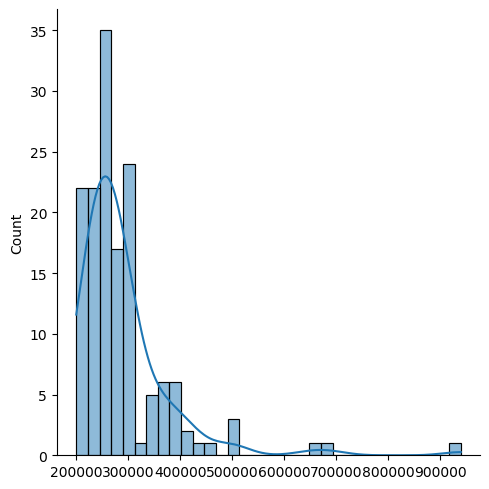

In [193]:
sns.displot(z_score,kde=True)

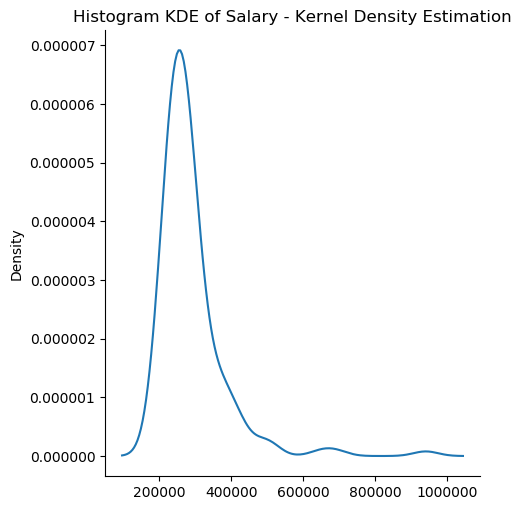

In [194]:
#The Kind parameter allows you to choose between histogram (kde- Kernel Density Estimation) kde or ecdf
#kde -provides a smooth curve that represents the distribution of data points, making it a useful tool for data visualization and analysis.
sns.displot(x=z_score, kind="kde")
plt.title("Histogram KDE of Salary - Kernel Density Estimation")
plt.show()

### Idenitfying  and removing  outliers before converting the normal distribution to standard normalization

In [195]:
#Step 1 Identify the Quantitatvie & Qualitatve Columns
Quan1,Qual1=QQUnivariate.quanQual(dataset)


In [196]:
#Step 2 Descriptive  values for Quantitative Columns.
descriptive=QQUnivariate.Univariate(Quan1,dataset)


In [197]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,107,72,70,69,73,63,288655
Median,108.5,72.5,68,68,72,62.245,265000
Mode,1,73,63,65,60,56.7,300000
Q1:25%,57.75,65,63,65,60,57.7725,240000
Q2:50%,108.5,72.5,68,68,72,62.245,265000
Q3:75%,153.25,78.125,75.25,72.4225,85,66.76,300000
Q4:100%,214,89.4,97.7,91,98,77.89,940000
99%,212.53,87.53,94.65,84.53,97.212,76.2224,671200
IQR,95.5,13.125,12.25,7.4225,25,8.9875,60000
1.5rule,143.25,19.6875,18.375,11.1337,37.5,13.4812,90000


In [198]:
# Step-3 Identify the Lesser(less than Min) and Greater (Greater than Max) Quantitative columns
Lesser,Greater = QQUnivariate.LesserGreater(Quan1,descriptive)


In [199]:
Greater

['hsc_p', 'degree_p', 'salary']

In [200]:
Lesser

[]

In [201]:
# Step-4 Replace the Lesser/Greater column values with min/max value
for columnName in Lesser:
    dataset[columnName][dataset[columnName] < descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
    
for columnName in Greater:
     dataset[columnName][dataset[columnName] > descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"] 


C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
# Step-5 Display the data  with replaced values
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [204]:
#Step-6 Descriptive values for  Quantitative columns
descriptive=QQUnivariate.Univariate(Quan1,dataset)

In [205]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,107,72,70,69,73,63,277649
Median,108.5,72.5,68,68,72,62.245,265000
Mode,1,73,63,65,60,56.7,300000
Q1:25%,57.75,65,63,65,60,57.7725,240000
Q2:50%,108.5,72.5,68,68,72,62.245,265000
Q3:75%,153.25,78.125,75.25,72.4225,85,66.76,300000
Q4:100%,214,89.4,93.625,83.5563,98,77.89,390000
99%,212.53,87.53,92.8612,83.5563,97.212,76.2224,390000
IQR,95.5,13.125,12.25,7.4225,25,8.9875,60000
1.5rule,143.25,19.6875,18.375,11.1337,37.5,13.4812,90000


In [209]:
# Step 7 validate Quantitative columns has no Greater or Lesser value columns
Lesser,Greater = QQUnivariate.LesserGreater(Quan1,descriptive)

In [210]:
Greater

[]

In [211]:
Lesser

[]

In [212]:
# Convert Normal Distribution to Stanard Normal Distrribution
def stdNBgraph(dataset):
    #import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values =[i for i in dataset]
    z_score=[(j-mean/std) for j in values]
    sum(z_score)/len(z_score)
    return z_score

In [213]:
z_score = stdNBgraph(dataset["salary"])

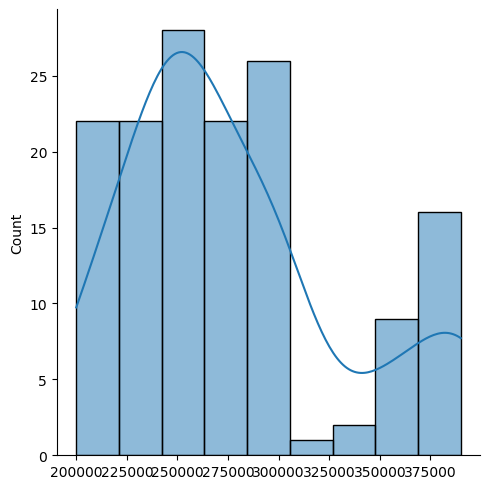

In [214]:
sns.displot(z_score,kde=True)

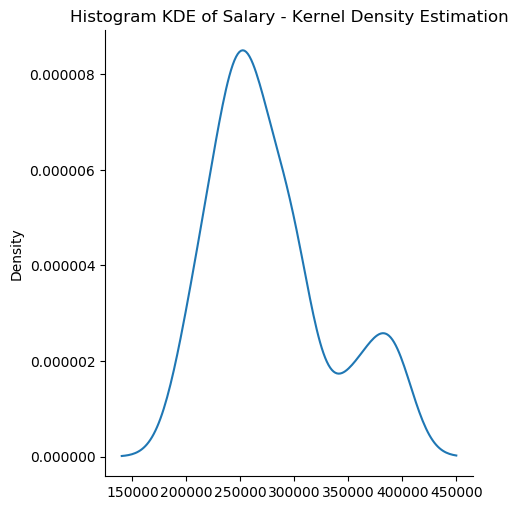

In [215]:
#The Kind parameter allows you to choose between histogram (kde- Kernel Density Estimation) kde or ecdf
#kde -provides a smooth curve that represents the distribution of data points, making it a useful tool for data visualization and analysis.
sns.displot(x=z_score, kind="kde")
plt.title("Histogram KDE of Salary - Kernel Density Estimation")
plt.show()

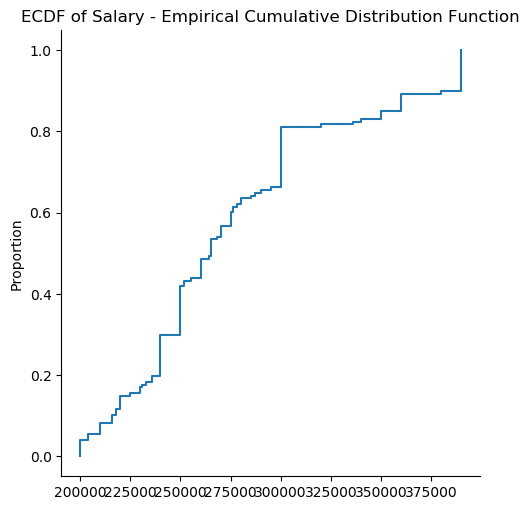

In [216]:
#ecdf plot visualizes the proportion or count of observations below each unique value in a dataset. 
# It is particularly useful for comparing distributions without requiring binning or smoothing.
sns.displot(x=z_score, kind="ecdf")
plt.title("ECDF of Salary - Empirical Cumulative Distribution Function")
plt.show()